## Lecture 9 – Data 100, Spring 2022

by Lisa Yan

Content from Lisa Yan, Suraj Rampure, Ani Adhikari, and Data 8 Textbook Chapter 15

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/dsKal100

/content/drive/MyDrive/Github/dsKal100


In [3]:
!ls

 cs-231n-python-colab.ipynb   lec
 disc			      other
 grad_proj		      proj
 hw			     'python-tutorial for cs231n Stanford.ipynb'
 lab			      README.md


In [4]:
%cd lec/lec09
!ls

/content/drive/MyDrive/Github/dsKal100/lec/lec09
ax3_figure.png	galton.csv  lec09.ipynb  little_women.csv  lw_params.png


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

### Correlation

Recreate the 4 correlation plots in slides (Normally this wouldn't be in the notebook, but it might be of interest to you.)

Note: We use `np.corrcoef` to compute the correlation coefficient $r$, though we could also compute manually too.

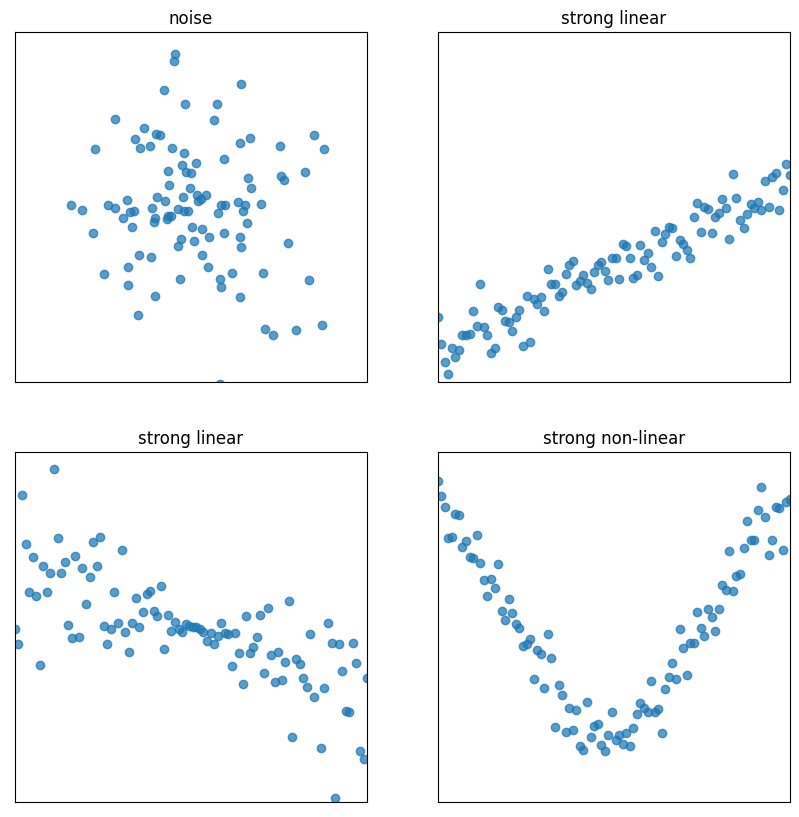

[-0.12066459676011669, 0.9508258477335819, -0.7230212909978788, 0.056355714456301234]


In [6]:
# set random seed recreate same random points as slides
np.random.seed(43)
plt.style.use('default') # revert style to default mpl

def plot_and_get_corr(ax, x, y, title):
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(x, y, alpha=0.73)
    ax.set_title(title)
    return np.corrcoef(x, y)[0, 1]

fig, axs = plt.subplots(2,2,figsize=(10,10))

# just noise
x1, y1 = np.random.randn(2, 100)
corr1 = plot_and_get_corr(axs[0, 0], x1, y1, title="noise")


# strong linear
x2 = np.linspace(-3, 3, 100)
y2 = x2*0.5 - 1 + np.random.randn(100)*0.3
corr2 = plot_and_get_corr(axs[0, 1], x2, y2, title="strong linear")


# unequal spread
x3 = np.linspace(-3, 3, 100)
y3 = - x3/3 + np.random.randn(100)*(x3)/2.5
corr3 = plot_and_get_corr(axs[1, 0], x3, y3, title="strong linear")
extent = axs[1, 0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('ax3_figure.png', bbox_inches=extent)


# strong non-linear
x4 = np.linspace(-3, 3, 100)
y4 = 2*np.sin(x3 - 1.5) + np.random.randn(100)*0.3
corr4 = plot_and_get_corr(axs[1, 1], x4, y4, title="strong non-linear")
# extent = axs[1, 1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('ax4_figure.png', bbox_inches=extent)

plt.show()
print([corr1, corr2, corr3, corr4])

## Which $\theta$ is best?


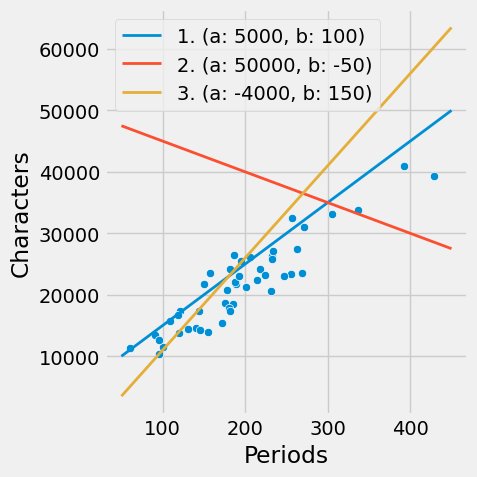

In [7]:
plt.style.use('fivethirtyeight')
lw = pd.read_csv("little_women.csv")
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()
sns.scatterplot(data=lw, x="Periods", y="Characters", ax=ax)

xlims = np.array([50, 450])
params = [[5000, 100], [50000, -50], [-4000, 150]]
for i, (a, b) in enumerate(params):
    ax.plot(xlims, a + b * xlims, lw=2, label=f"{i+1}. (a: {a}, b: {b})")
ax.legend()

# the best parameters weren't one of the choices
ahat_true, bhat_true = 4745, 87
fig.tight_layout()
plt.savefig('lw_params.png')

## Simple Linear Regression

First, let's implement the tools we'll need for regression.

$$x_{i_{std}} = \frac{x_i - \bar{x}}{\sigma_x}$$

$$r = \frac{1}{n}\sum_{i=1}^n x_{i_{std}} y_{i_{std}}$$

Correlation is the average of the product of $x_{i_{std}}$ and $y_{i_{std}}$

In [8]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

Let's read in our data. The data is pulled from Chapter 15 of Data 8 ([textbook chapter](https://inferentialthinking.com/chapters/15/Prediction.html)) and are based on the famous 1885 study of Francis Galton exploring the relationship between the heights of adult children and the heights of their parents (*Regression towards Mediocrity*, 1885: [JSTOR link](https://www.jstor.org/stable/2841583)).

In [9]:
df = pd.read_csv('galton.csv')
df

,parent,child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [10]:
np.mean(df['parent']), np.mean(df['child'])

(69.20677301927195, 66.74593147751605)

In [11]:
df.describe()

,parent,child
count,934.000000,934.000000
mean,69.206773,66.745931
std,1.802370,3.579251
min,64.400000,56.000000
25%,68.140000,64.000000
50%,69.248000,66.500000
75%,70.140000,69.700000
max,75.430000,79.000000


In [12]:
df.apply(np.mean, axis=0)

parent    69.206773
child     66.745931
dtype: float64

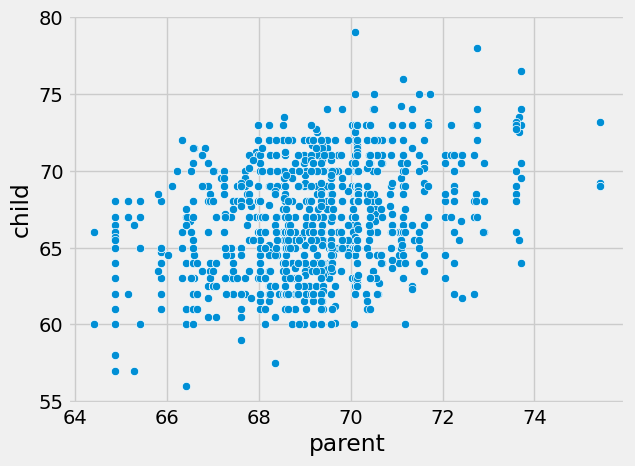

In [13]:
sns.scatterplot(data=df, x="parent", y="child")

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


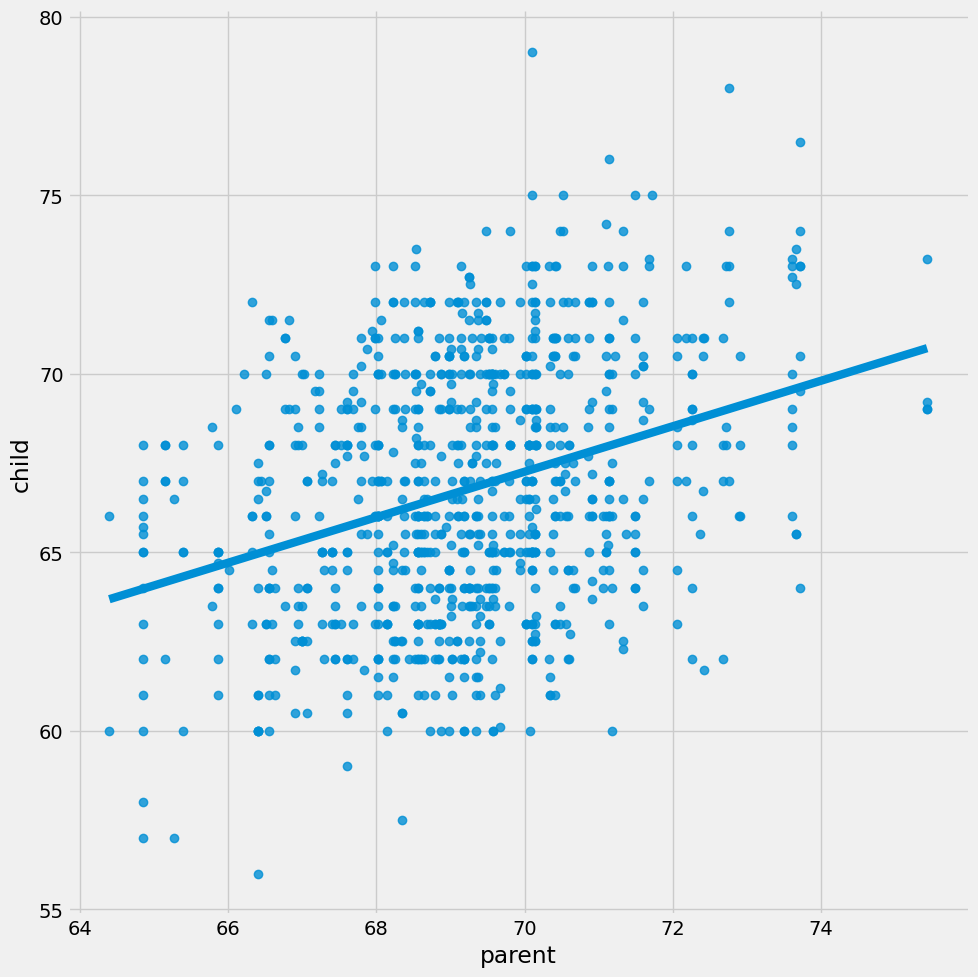

In [14]:
sns.lmplot(data=df, x="parent", y="child", ci=None, size=10)

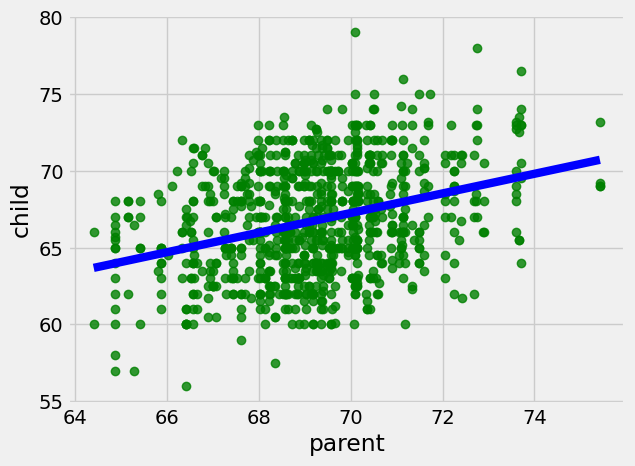

In [15]:
sns.regplot(data=df, x= 'parent', y = 'child', ci=None, color="green", line_kws={"color":"blue"})

In [16]:
fig = px.scatter(df, x= 'parent', y = 'child')
fig.show()

Using our `correlation` function:

In [17]:
correlation(df['parent'], df['child'])

0.32094989606395924

Using an in-built `correlation` function:
* The matrix elements are symmetric: elements are correlations of (x, x), (x, y), (y, x), and (y, y).
* NumPy and pandas functions.

In [18]:
np.corrcoef(df['parent'], df['child'])

array([[1.       , 0.3209499],
       [0.3209499, 1.       ]])

In [19]:
df.corr()

,parent,child
parent,1.00000,0.32095
child,0.32095,1.00000


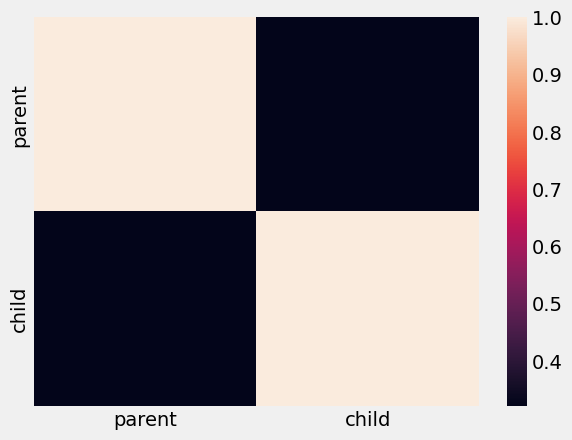

In [20]:
sns.heatmap(data=df.corr())

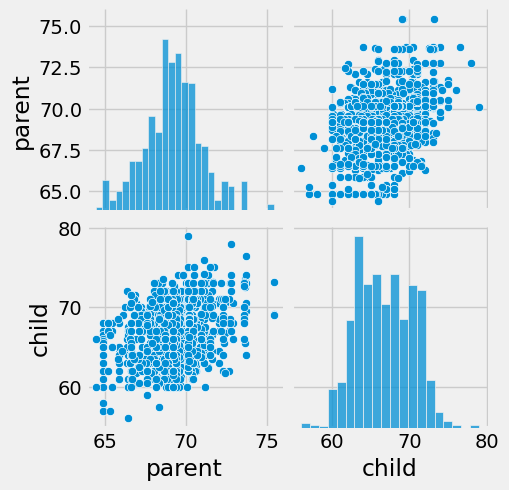

In [21]:
sns.pairplot(data=df)

$\hat{y_i} = b_0 + b_1x_i = \hat{a} + \hat{b}x_i$

$b_1 = \hat{b} = r\frac{\sigma_y}{\sigma_x}$

$b_0 = \hat{a} = \bar{y} - b_1\bar{x}$

In [22]:
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

In [23]:
ahat = intercept(df['parent'], df['child'])
bhat = slope(df['parent'], df['child'])

print("predicted y = {} + {} * average parent's height".format(np.round(ahat, 2), np.round(bhat, 2)))

predicted y = 22.64 + 0.64 * average parent's height


Let's see what our linear model looks like.

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['parent'], y = df['child'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = df['parent'], y = ahat + bhat*df['parent'], name = 'linear model', line=dict(color='red')))


fig.update_layout(xaxis_title = 'MidParent Height', yaxis_title = 'Child Height')

Note: The cool thing about plotly is that you can hover over the points and it will tell you whether it is a prediction or actual value.

# Evaluating the Model

In [28]:
# helper functions
def fit_least_squares(x, y):
    ahat = intercept(x, y)
    bhat = slope(x, y)
    return ahat, bhat

def predict(x, ahat, bhat):
    return ahat + bhat*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

Below we define `least_squares_evaluation` which:
* Computes general data statistics like mean, standard deviation, and linear correlation $r$
* Fits least squares to data of the form $(x, y)$
* Computes performance metrics like RMSE
* Optionally plots two visualizations:
    * Original scatter plot with fitted line
    * Residual plot

In [25]:
plt.style.use('default') # revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"ahat: {ahat:.2f}, bhat: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

Let's first try just doing linear fit *without* visualizing data.

**Note**: Computation without visualization is NOT a good practice! We are doing the three evaluation steps **out of order** to highlight the importance of visualization.

Here are the evaluation steps **in order**:
1. Visualize original data, compute statistics
2. If it seems reasonable, fit linear model
3. Finally, compute performance metrics of linear model and plot residuals and other visualizations

In [26]:
# Load in four different datasets: I, II, III, IV
anscombe = sns.load_dataset('anscombe')
anscombe['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

### Compute statistics and performance metrics only

In [29]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    least_squares_evaluation(ans['x'], ans['y'], visualize=NO_VIZ)
    print()
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118




Wow, looks like all four datasets have the same:
* statistics of $x$ and $y$
* correlation $r$
* regression line parameters $\hat{a}, \hat{b}$
* RMSE (average squared loss)

### Plot Residuals

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


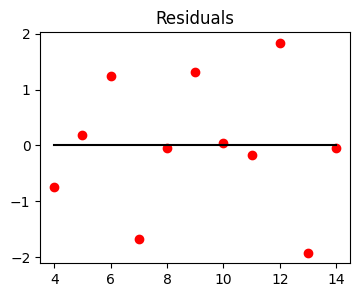



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


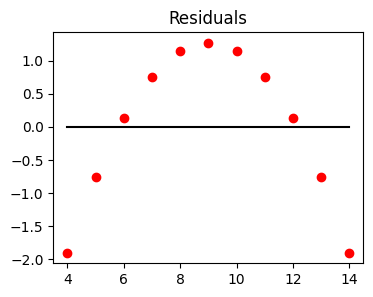



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


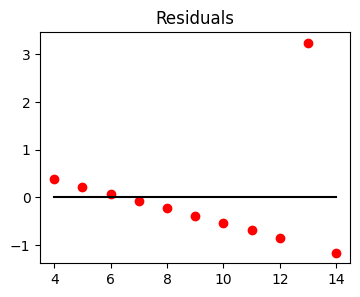



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118


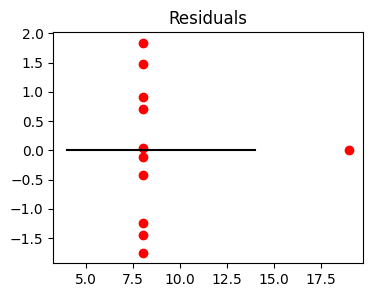

In [30]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize=RESID)
    plt.show(fig)
    print()
    print()

### Visualize the original data (what we should have done at the beginning)

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


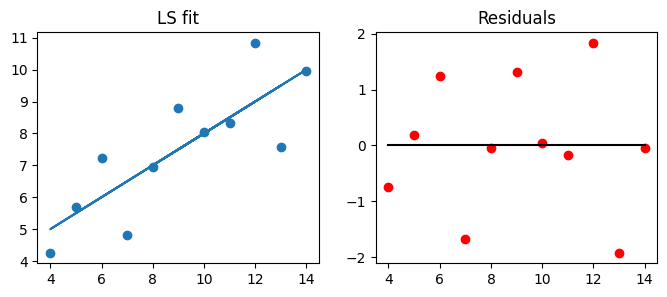



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


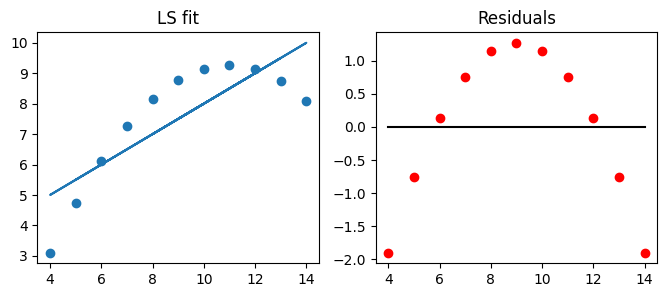



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


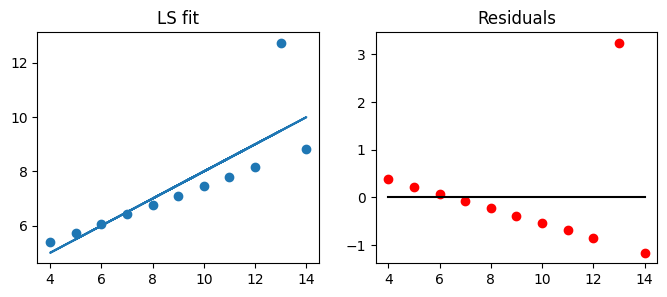



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118


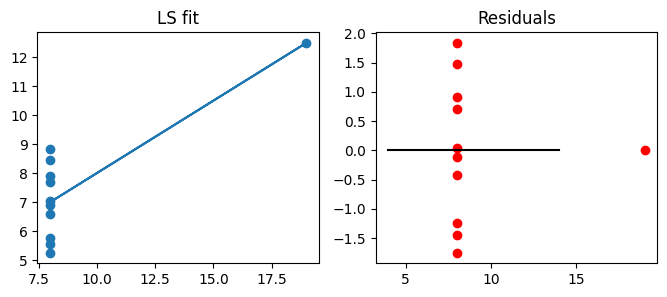

In [31]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize=RESID_SCATTER)
    plt.show(fig)
    print()
    print()